In [1]:
import numpy as np
import torch

In [2]:
#Format Data for KNN - 17 '
#load dataset, training and testing, examples(x) and labels(y)
train_x = torch.load("train_x.pt", map_location=torch.device('cpu')).numpy()
train_y = torch.load("train_y.pt", map_location=torch.device('cpu')).numpy()
test_x = torch.load("test_x.pt", map_location=torch.device('cpu')).numpy()
test_y = torch.load("test_y.pt", map_location=torch.device('cpu')).numpy()

#Format data - 
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1]*train_x.shape[2]) 
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1]*test_x.shape[2]) 

FeatureNames=['fighting','front', 'ready','cat', 'horse', 'hicho','seiza']


In [3]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
dt = tree.DecisionTreeClassifier()
dt = dt.fit(train_x, train_y)

print(dt.score(test_x, test_y))
y_pred = dt.predict(test_x)
print( confusion_matrix(test_y, y_pred))



0.625
[[10  1  1  0  1  1  0]
 [ 5 15  1  2 10  1  0]
 [ 0  3 15  1  0  0  0]
 [ 2  5  3  3  1  1  0]
 [ 0  5  2  4 23  0  1]
 [ 0  2  0  1  0  7  0]
 [ 0  2  1  0  0  0 22]]


In [4]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(test_y, y_pred))
print("Recall: ",metrics.recall_score(test_y, y_pred, average='weighted'))
#print("Specificity: ",metrics.accuracy_score(test_y, y_pred))
print("Precision: ",metrics.precision_score(test_y, y_pred,average='weighted'))
#print("Negative Predictive value: ",metrics.accuracy_score(test_y, y_pred))
#print("FP rate(fall-out): ",metrics.accuracy_score(test_y, y_pred))

Accuracy:  0.625
Recall:  0.625
Precision:  0.618980897955188


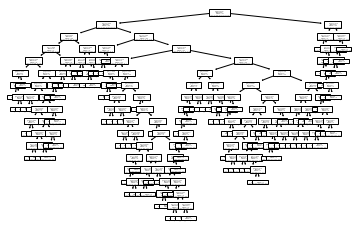

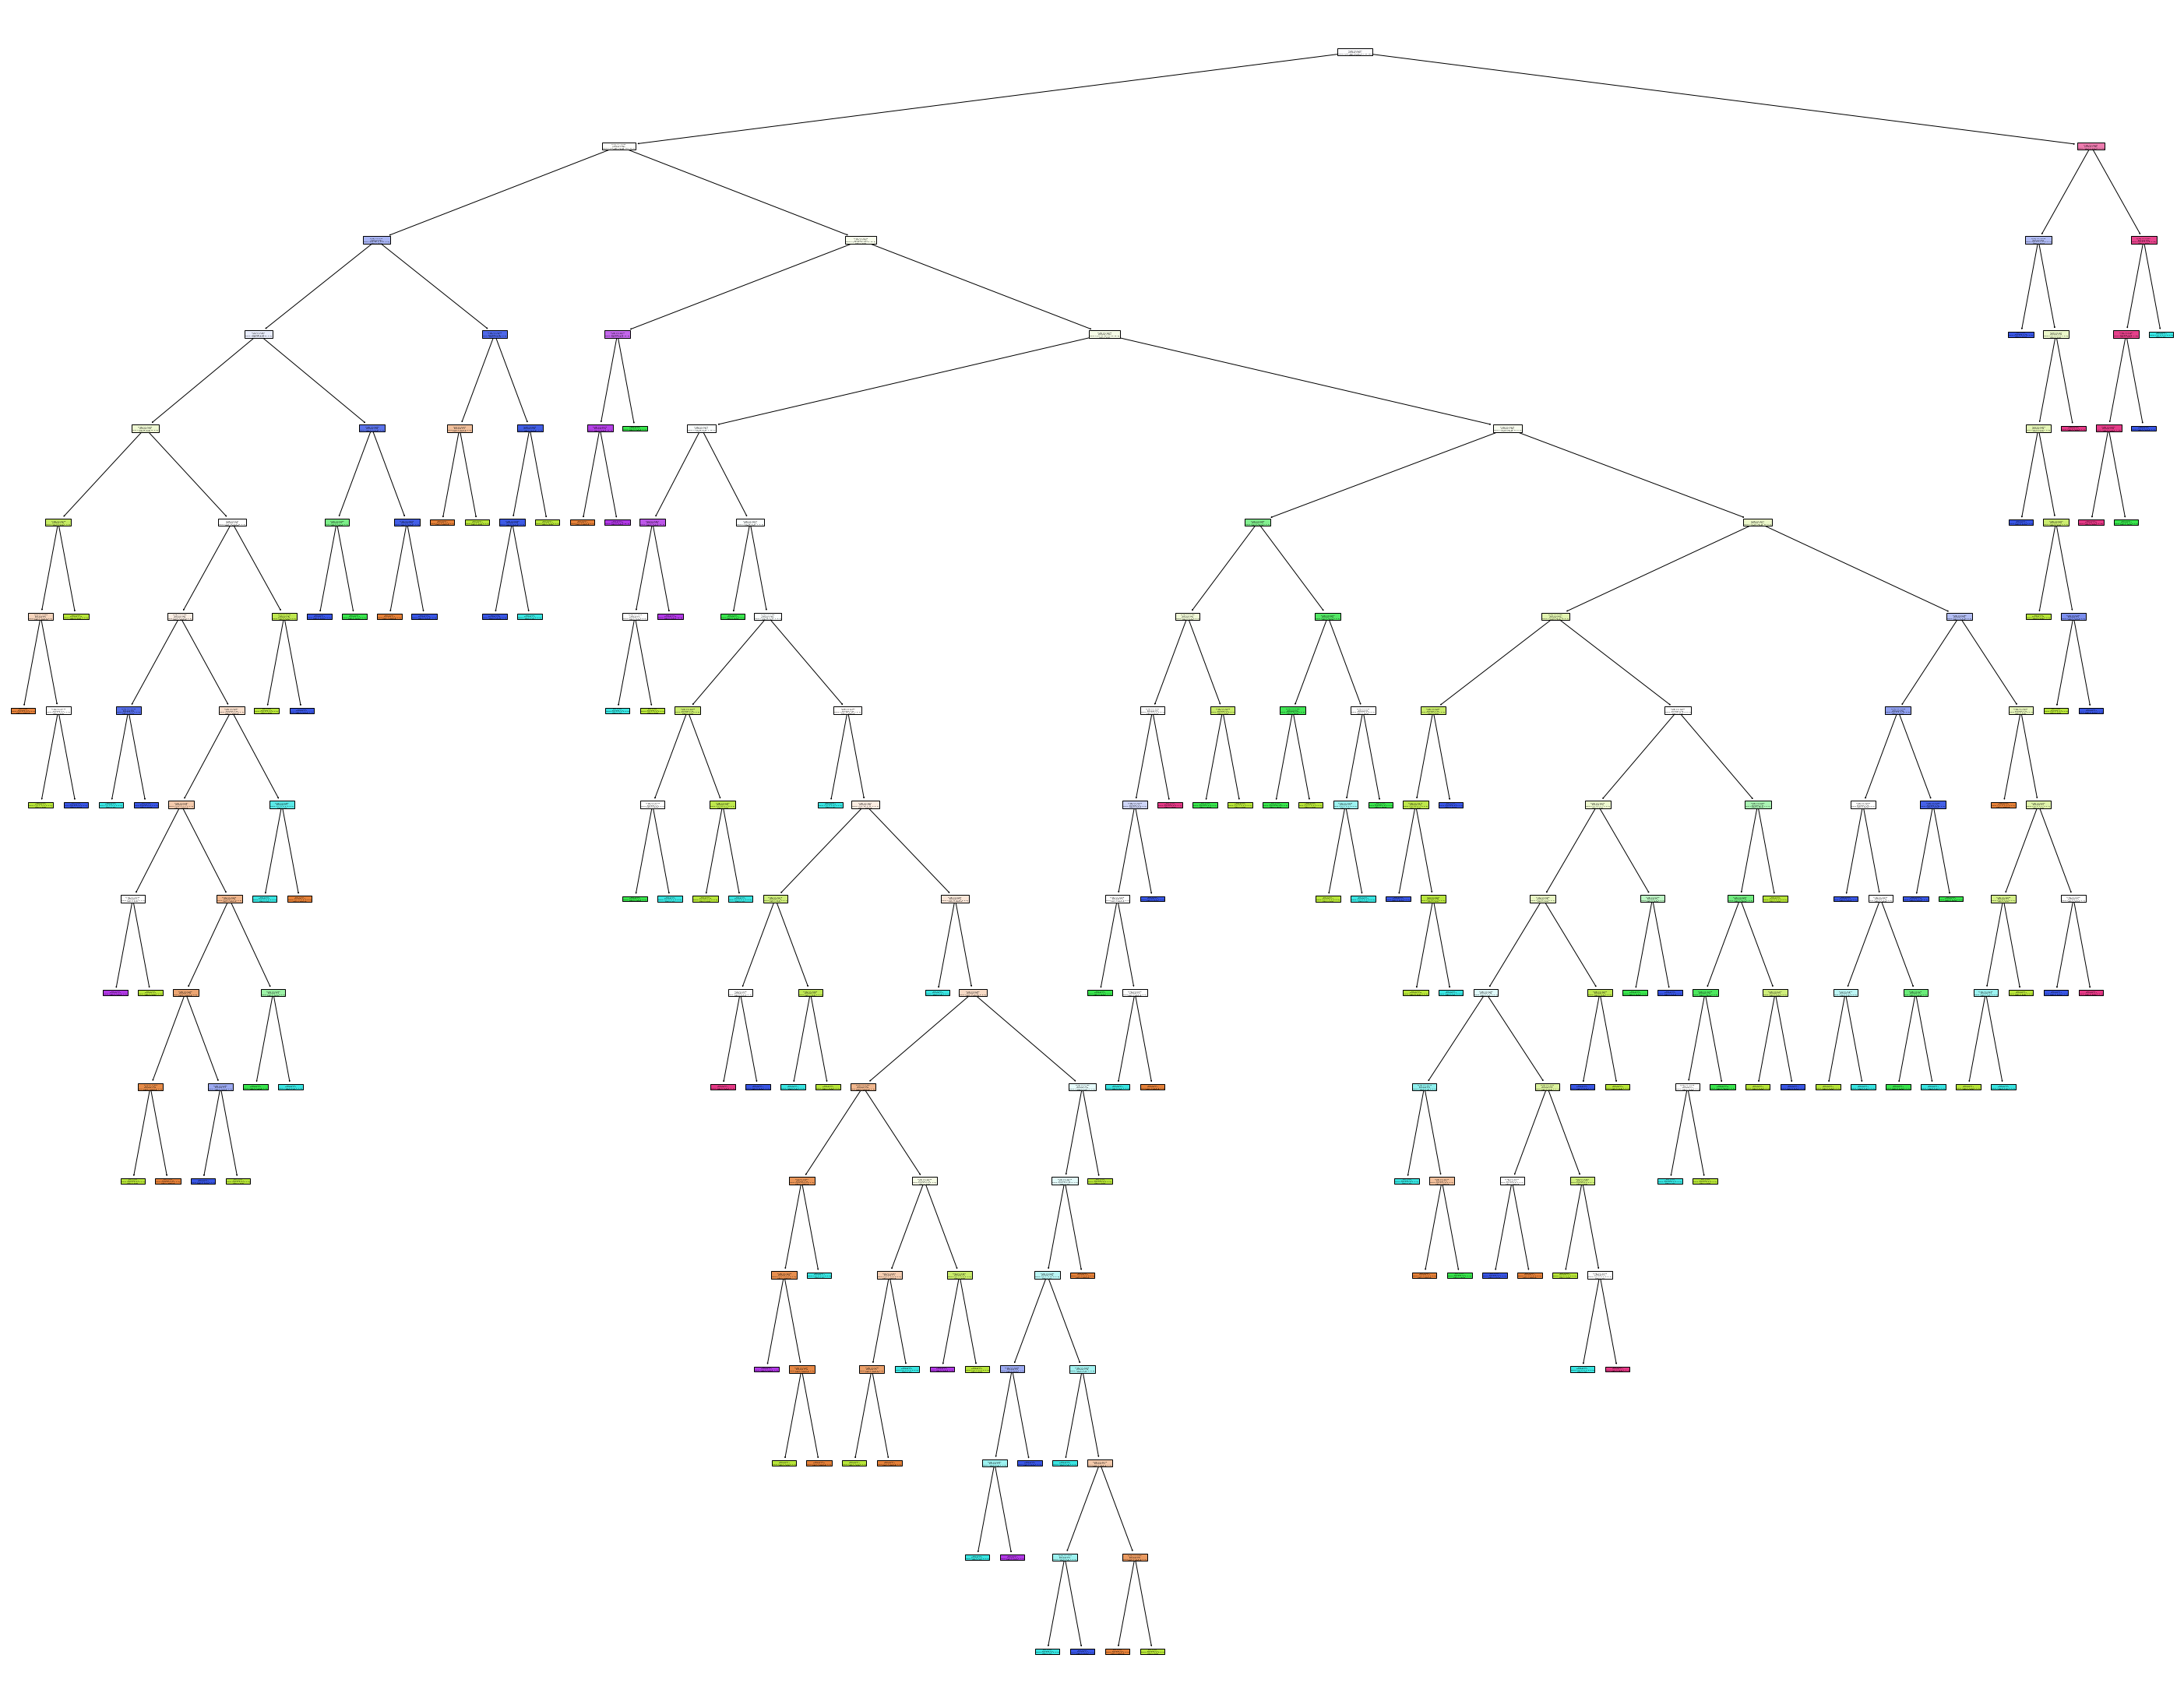

In [9]:
from matplotlib import pyplot as plt

tree.plot_tree(dt)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,   
                   class_names=FeatureNames,
                   filled=True)

In [6]:
from sklearn.tree import export_text
r = export_text(dt)
print(r)

|--- feature_34 <= 0.17
|   |--- feature_27 <= -0.23
|   |   |--- feature_36 <= 0.34
|   |   |   |--- feature_4 <= -0.35
|   |   |   |   |--- feature_30 <= -0.47
|   |   |   |   |   |--- feature_23 <= -0.27
|   |   |   |   |   |   |--- feature_1 <= -0.82
|   |   |   |   |   |   |   |--- feature_42 <= -0.06
|   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- feature_42 >  -0.06
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  -0.82
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_23 >  -0.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_30 >  -0.47
|   |   |   |   |   |--- feature_39 <= 0.42
|   |   |   |   |   |   |--- feature_28 <= 0.21
|   |   |   |   |   |   |   |--- feature_25 <= -0.14
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- feature_25 >  -0.14
|   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- feature_28 >  